# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
sample1 = np.random.normal(50, 5, 10)
sample2 = np.random.normal(50, 5, 50)
sample3 = np.random.normal(50, 5, 500)
sample4 = np.random.normal(50, 5, 50000)

s1 = normaltest(sample1)
s2 = normaltest(sample2)
s3 = normaltest(sample3)
s4 = normaltest(sample4)

print(s1)
print(s2)
print(s3)
print(s4)


NormaltestResult(statistic=2.664887581572928, pvalue=0.2638317233065991)
NormaltestResult(statistic=0.17142440616782995, pvalue=0.9178583500145778)
NormaltestResult(statistic=1.1206215422496004, pvalue=0.5710315761460014)
NormaltestResult(statistic=0.1169883548963166, pvalue=0.9431837321198552)


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Interpret the normaltest results and make your observations.

Traditionally, in statistics, you need a p-value of less than 0.05 to reject the null hypothesis, which means that in our samples all the hypotheses are valid.




#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

Text(0.5, 1.0, 'Plot 4')

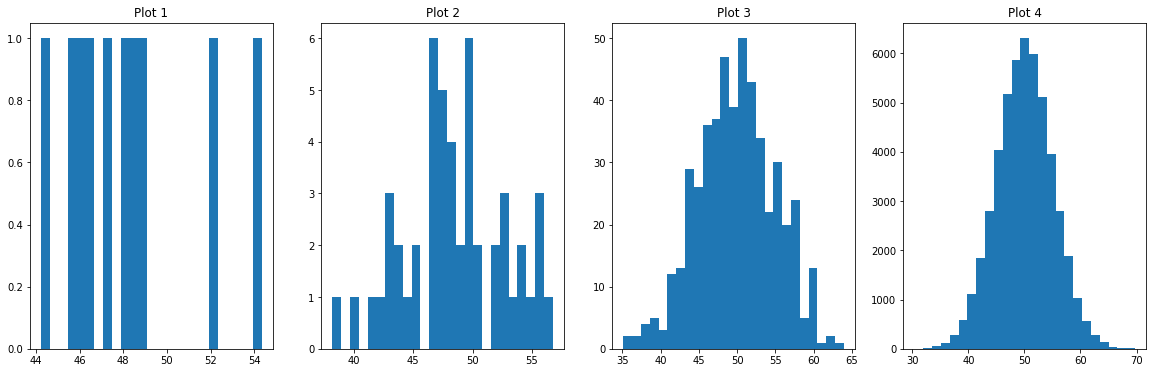

In [3]:
# Your code here

plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
plt.hist(sample1,bins=25)
plt.title("Plot 1")



plt.subplot(1,4,2)
plt.hist(sample2,bins=25)
plt.title("Plot 2")

plt.subplot(1,4,3)
plt.hist(sample3,bins=25)
plt.title("Plot 3")

plt.subplot(1,4,4)
plt.hist(sample4,bins=25)
plt.title("Plot 4")


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

CLT is a statistical theory stating that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. 

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

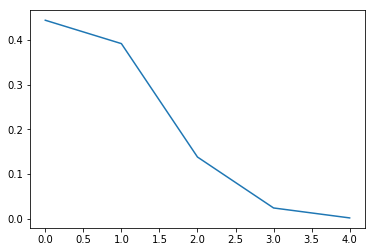

In [4]:
fig, ax = plt.subplots(1, 1)

n = 5
p = 0.15

x = np.arange(n)
plt.plot(x, binom.pmf(x, n, p))
plt.show()







#### Explain what you observe from the plot above

The probability that everybody watches the video is almost null, while that no one watches is high. Example: The probability that two people watch the video is around 0.15.

#### Now plot PMP with 50, 500, and 5000 visitors.

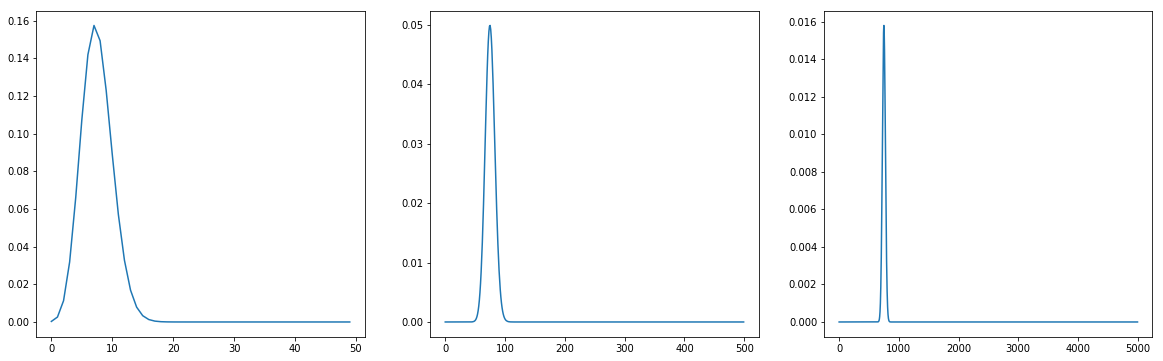

In [5]:
plt.figure(figsize=(20,6))


plt.subplot(1,3,1)
n = 50
p = 0.15
x = np.arange(n)
plt.plot(x, binom.pmf(x, n, p))



plt.subplot(1,3,2)
n = 500
p = 0.15
x = np.arange(n)
plt.plot(x, binom.pmf(x, n, p))

plt.subplot(1,3,3)
n = 5000
p = 0.15
x = np.arange(n)
plt.plot(x, binom.pmf(x, n, p))


#### What did you notice from the distribution plots? Comment your findings.

The bigger is the sample, the closest is the probability that it gets to 0.15.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

A discrete variable distribution in which the event repeats n times in a fixed interval of time.
Example: A car that pass through the same point of a road five times. 

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [6]:
#poisson.pmf(k, mu, loc)
#mu : array_like - shape parameters
# loc : array_like, optional- location parameter (default=0)

poisson.pmf(320, 300) 

0.011612348610402475

#### What is the probability of getting 60 visits?

In [7]:
poisson.pmf(60, 300) 

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

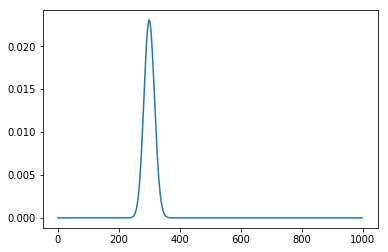

In [9]:
n = 1000
mu = 300
x = np.arange(n)
plt.plot(x, poisson.pmf(x,mu))